In [121]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv('C:/Users/Venu  Gopal/Desktop/churn_prediction.csv')
df.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [123]:
#checking for any null vales
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

- There are five columns with null values 

In [124]:
#checking the shape of DataFrame
df.shape

(28382, 21)

# Treating Missing Values 

## Gender 

In [125]:
df["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

So there is a good mix of males and females and arguably missing values cannot be filled with any one of them. We could create a seperate category by assigning the value -1 for all missing values in this column.

Before that, first we will convert the gender into 0/1 and then replace missing values with -1

In [126]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

In [127]:
df["gender"].value_counts()

 1.0    16548
 0.0    11309
-1.0      525
Name: gender, dtype: int64

## dependents 

In [128]:
df["dependents"].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [129]:
df["dependents"]=df["dependents"].fillna(value=0.0)

In [130]:
df['dependents'].value_counts()

0.0     23898
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

- Replacing null  values with 0 as the probability of being 0 is much more than any other value

## Ocuupation

In [131]:
df["occupation"].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

- replacing null values with self employed 

In [132]:
df["occupation"]=df["occupation"].fillna(value="self_employed")

## City 

In [133]:
df["city"].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

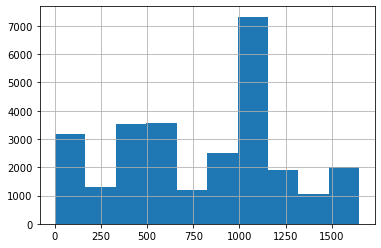

In [134]:
df["city"].hist()

- it appears the mode is somewhere around 1100

In [135]:
df["city"]=df["city"].fillna(value=1100)

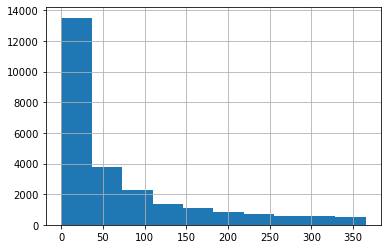

In [136]:
df["days_since_last_transaction"].hist()

In [137]:
df["days_since_last_transaction"].fillna(value=30,inplace=True)

In [138]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

- Now we are done with filling null values
- Let's go to Univariate Analysis and try to remove outliers 

# Univariate Analysis 

In [139]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

- Separating them into categorical  and continuos variables


In [140]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                            float64
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

 - Removing id and converting age,dependents,city,customer_nw_cat to Categorical Variables 

In [141]:
df=df.drop("customer_id",axis=1)

## Vintage 

In [142]:
import matplotlib.pyplot as plt

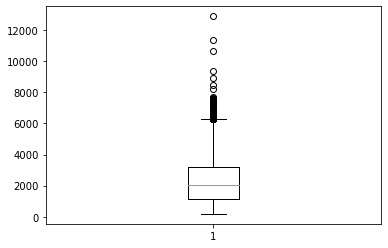

In [143]:
plt.boxplot(df["vintage"])
plt.show()

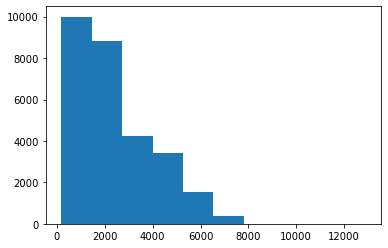

In [144]:
plt.hist(df["vintage"])
plt.show()

- It is right skewed and let's correcct it by applying log

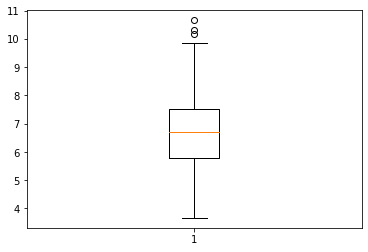

In [145]:
plt.boxplot(np.power(df['vintage'],0.25))
plt.show()

 - This looks way better than what it was earlier and there are few outliers >10


In [146]:
df['vintage']=np.power(df['vintage'],0.25)

In [147]:
df.loc[df["vintage"]>9.8].shape

(4, 20)

 - let's change them to 9


In [148]:
df=df.replace(to_replace=df['vintage']>9.5,value=9)

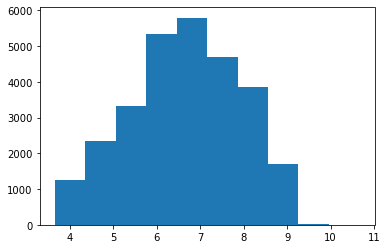

In [149]:
import numpy as np
plt.hist(df['vintage'])
plt.show()

## Age 

In [150]:
df['age'].describe()

count    28382.000000
mean        48.208336
std         17.807163
min          1.000000
25%         36.000000
50%         46.000000
75%         60.000000
max         90.000000
Name: age, dtype: float64

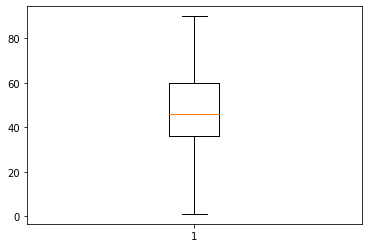

In [151]:
plt.boxplot(df['age'])
plt.show()

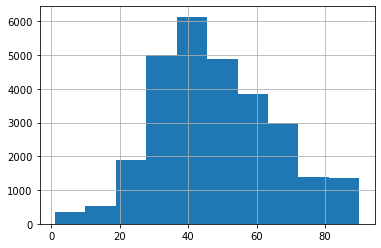

In [152]:
df['age'].hist()

- There are no outliers

In [153]:
df['age_cate']=pd.cut(df["age"],3,labels=["Youth","Middle_Aged","Old"])

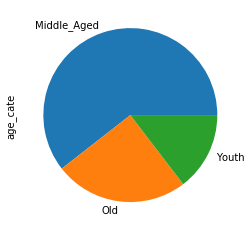

In [154]:
df['age_cate'].value_counts().plot(kind='pie')

- There are more middle aged people , next to is old category, Youth is the least 

## Gender 

In [155]:
df['gender'].value_counts(normalize=True)

 1.0    0.583046
 0.0    0.398457
-1.0    0.018498
Name: gender, dtype: float64

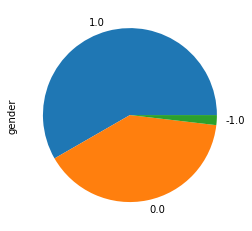

In [156]:
df['gender'].value_counts(normalize=True).plot(kind='pie')

- There are more males than female

## Dependents 

In [157]:
df['dependents'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    2.0
Name: dependents, dtype: float64

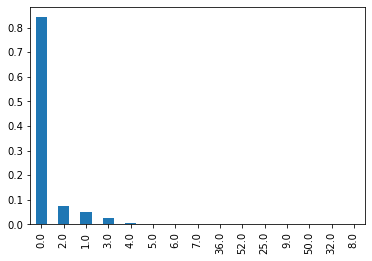

In [158]:
df['dependents'].value_counts(normalize=True).plot(kind="bar")

- Creating a new category >4 and changing dtype to category/

In [159]:
df=df.replace(to_replace=df['dependents']>=4,value=5)

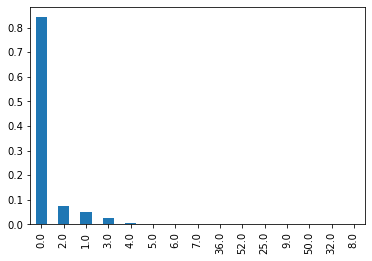

In [160]:
df['dependents'].value_counts(normalize=True).plot(kind="bar")

In [161]:
df['dependents']=df['dependents'].astype("category")

In [162]:
df['dependents'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    2.0
Name: dependents, dtype: category
Categories (15, float64): [0.0, 1.0, 2.0, 3.0, ..., 32.0, 36.0, 50.0, 52.0]

## Occupation 

In [163]:
df['occupation'].head()

0    self_employed
1    self_employed
2         salaried
3    self_employed
4    self_employed
Name: occupation, dtype: object

In [164]:
df['occupation'].value_counts(normalize=True)

self_employed    0.618561
salaried         0.236206
student          0.072511
retired          0.071313
company          0.001409
Name: occupation, dtype: float64

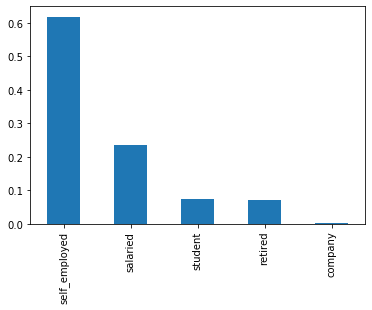

In [165]:
df['occupation'].value_counts(normalize=True).plot(kind="bar")

- Most of them are self employed

## Customer Category

In [166]:

df['customer_nw_category'].head()

0    2
1    2
2    2
3    2
4    3
Name: customer_nw_category, dtype: int64

In [167]:
df['customer_nw_category'].value_counts(normalize=True)

2    0.512966
3    0.356282
1    0.130752
Name: customer_nw_category, dtype: float64

In [168]:
df['customer_nw_category']=df['customer_nw_category'].astype("category")

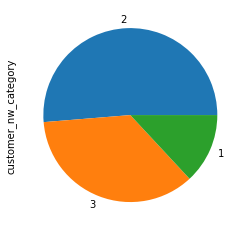

In [169]:
df['customer_nw_category'].value_counts().plot(kind="pie")
plt.show()

- There are more number of Medium net worth people and very less category of High people

## days since last transaction

In [170]:
df['days_since_last_transaction'].head()

0    224.0
1     60.0
2     30.0
3    147.0
4     58.0
Name: days_since_last_transaction, dtype: float64

In [171]:
df['days_since_last_transaction'].describe()

count    28382.000000
mean        65.455747
std         82.275475
min          0.000000
25%         13.000000
50%         30.000000
75%         83.000000
max        365.000000
Name: days_since_last_transaction, dtype: float64

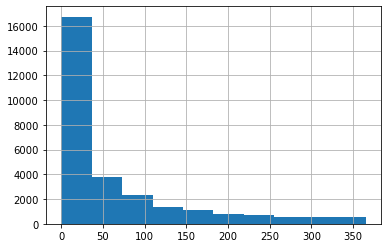

In [172]:
df['days_since_last_transaction'].hist()

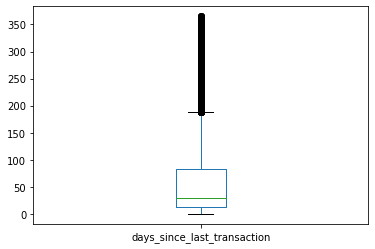

In [173]:
df['days_since_last_transaction'].plot(kind="box")

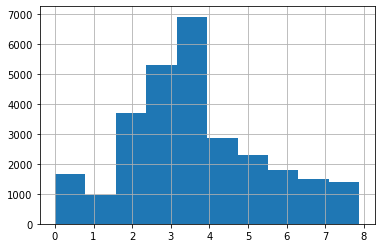

In [174]:
np.power(df['days_since_last_transaction'],0.35).hist()

In [175]:
df['days_since_last_transaction']=np.power(df['days_since_last_transaction'],.35)

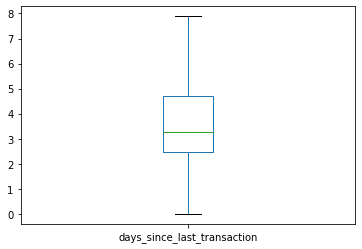

In [176]:
df['days_since_last_transaction'].plot(kind="box")

- Let's try Logistic,DecisonTree and RandomForest classifier Alogorithms

In [184]:
df.head()

,vintage,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age_cate
0,7.482718,1.0,0.0,self_employed,187.0,2,755,6.646405,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,Old
1,4.196048,1.0,0.0,self_employed,1100.0,2,3214,4.191340,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,Middle_Aged
2,6.966968,1.0,0.0,salaried,146.0,2,41,3.288459,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,Middle_Aged
3,4.675811,-1.0,0.0,self_employed,1020.0,2,582,5.735365,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,Old
4,7.092887,1.0,2.0,self_employed,1494.0,3,388,4.141902,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,Middle_Aged


In [185]:
df.shape

(28382, 20)

# Preprocessing

Now, before applying linear model such as logistic regression, we need to scale the data and keep all features as numeric strictly. 


In [177]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [187]:
df.head()

,vintage,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age_cate
0,7.482718,1.0,0.0,self_employed,187.0,2,755,6.646405,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,Old
1,4.196048,1.0,0.0,self_employed,1100.0,2,3214,4.191340,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,Middle_Aged
2,6.966968,1.0,0.0,salaried,146.0,2,41,3.288459,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,Middle_Aged
3,4.675811,-1.0,0.0,self_employed,1020.0,2,582,5.735365,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,Old
4,7.092887,1.0,2.0,self_employed,1494.0,3,388,4.141902,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,Middle_Aged


In [181]:
df.dtypes

vintage                            float64
gender                             float64
dependents                        category
occupation                          object
city                               float64
customer_nw_category              category
branch_code                          int64
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
age_cate                          category
dtype: object

In [182]:
df['gender']=df['gender'].astype("category")

In [183]:
df['occupation']=df['occupation'].astype("category")

In [188]:
df=pd.get_dummies(data=df,columns=['age_cate',"occupation","gender","dependents","customer_nw_category"])

In [191]:
y_all=df['churn']

In [192]:
df=df.drop('churn',axis=1)

In [196]:
num_cols = [ 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
scaled=ss.fit_transform(df[num_cols])
scaled_df=pd.DataFrame(scaled,columns=num_cols)

In [197]:
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled_df,left_index=True,right_index=True,how = "left")

In [198]:
df.head()

,vintage,city,branch_code,days_since_last_transaction,age_cate_Youth,age_cate_Middle_Aged,age_cate_Old,occupation_company,occupation_retired,occupation_salaried,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,7.482718,187.0,755,6.646405,0,0,1,0,0,0,...,-0.139017,-0.141953,-0.127317,-0.144709,-0.044545,-0.109858,-0.070378,-0.137427,-0.142564,-0.142265
1,4.196048,1100.0,3214,4.191340,0,1,0,0,0,0,...,-0.046720,0.028425,0.118793,0.007249,-0.044540,-0.109846,0.035155,-0.133297,-0.022705,0.030459
2,6.966968,146.0,41,3.288459,0,1,0,0,0,1,...,-0.081398,-0.039514,-0.096652,-0.061991,-0.044539,-0.109844,0.045936,-0.126767,-0.058165,-0.057152
3,4.675811,1020.0,582,5.735365,0,0,1,0,0,0,...,-0.119457,-0.122361,-0.137244,-0.129711,-0.044541,-0.109849,-0.070372,-0.049234,-0.122742,-0.137290
4,7.092887,1494.0,388,4.141902,0,1,0,0,0,0,...,-0.151482,-0.143293,-0.117848,-0.140285,-0.044543,-0.085794,-0.059058,-0.074142,-0.149738,-0.137116


## Model Building and Evaluation Metrics
Since this is a binary classification problem, we could use the following 2 popular metrics:

1. Recall
2. Area under the Receiver operating characteristic curve

Now, we are looking at the recall value here because a customer falsely marked as churn would not be as bad as a customer who was not detected as a churning customer and appropriate measures were not taken by the bank to stop him/her from churning

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

Our main metric here would be Recall values, while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes.

### Train Test Split to create a validation set

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
xtrain, xtest, ytrain, ytest = train_test_split(df,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
mod=DecisionTreeClassifier()


In [203]:
mod.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [204]:
pred=mod.predict_proba(xtest)[:,1]

### AUC ROC Curve  

Now, let us quickly look at the AUC-ROC curve for our  model 

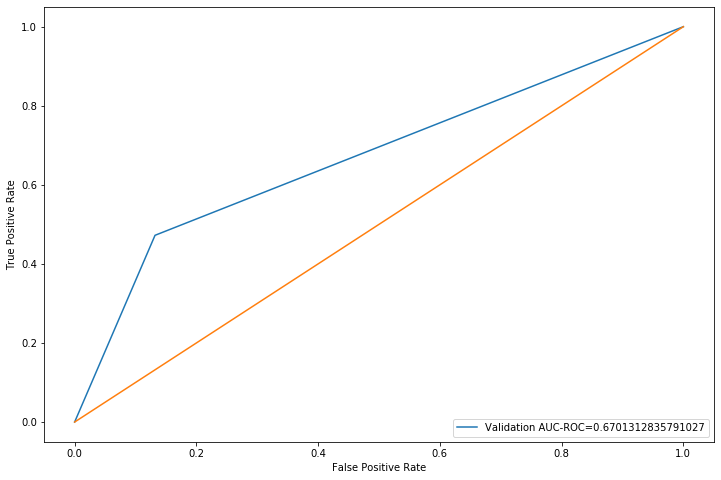

In [206]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [70]:
auc

0.6724760296752753

In [207]:
from sklearn.metrics import recall_score

In [208]:
recall_score(ytest,pred)

0.47233314318311465

### Cross validation


Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.

We divide the entire population into k equal samples. Now we train models on k-1 samples and validate on 1 sample. Then, at the second iteration we train the model with a different sample held as validation. 

In k iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power.

Since it builds several models on different subsets of the dataset, we can be more sure of our model performance

In [209]:
from sklearn.model_selection import StratifiedKFold

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [229]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    rec_score=[]
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores and Recall scores
        cv_scores.append(roc_score)
        rec_score.append(recall)
        
        i+=1
    return (cv_scores,rec_score)

In [236]:
Dec_Score=cv_score(DecisionTreeClassifier(criterion="entropy",random_state=10))
Dec_ROC=Dec_Score[0]
Dec_recall=Dec_Score[1]


1 of kfold 5
ROC AUC Score: 0.6629252903093208, Recall Score: 0.4582, Precision Score: 0.4406 

2 of kfold 5
ROC AUC Score: 0.6798212927756654, Recall Score: 0.4876, Precision Score: 0.4643 

3 of kfold 5
ROC AUC Score: 0.6537321398029129, Recall Score: 0.4344, Precision Score: 0.4377 

4 of kfold 5
ROC AUC Score: 0.6630166464930861, Recall Score: 0.4629, Precision Score: 0.4348 

5 of kfold 5
ROC AUC Score: 0.6574464358545923, Recall Score: 0.4449, Precision Score: 0.4378 


In [238]:
Log_score=cv_score(LogisticRegression(random_state=10))
Log_ROC=Log_score[0]
Log_Recall=Log_score[1]


1 of kfold 5
ROC AUC Score: 0.6253490905354023, Recall Score: 0.0086, Precision Score: 0.6923 

2 of kfold 5
ROC AUC Score: 0.6372518754495942, Recall Score: 0.0143, Precision Score: 0.6522 

3 of kfold 5
ROC AUC Score: 0.6482083887010406, Recall Score: 0.0171, Precision Score: 0.4186 

4 of kfold 5
ROC AUC Score: 0.6302671957845987, Recall Score: 0.0105, Precision Score: 0.5500 

5 of kfold 5
ROC AUC Score: 0.6481401384083045, Recall Score: 0.0228, Precision Score: 0.5854 


- DecisionTreeClassifier works very well in terms of recall

In [294]:
from sklearn import tree

In [295]:
decision_tree=tree.export_graphviz(model,out_file=None,feature_names=xtrain.columns,filled=True,max_depth=3)

In [296]:
!dot -Tpng tree.dot -o tree.png

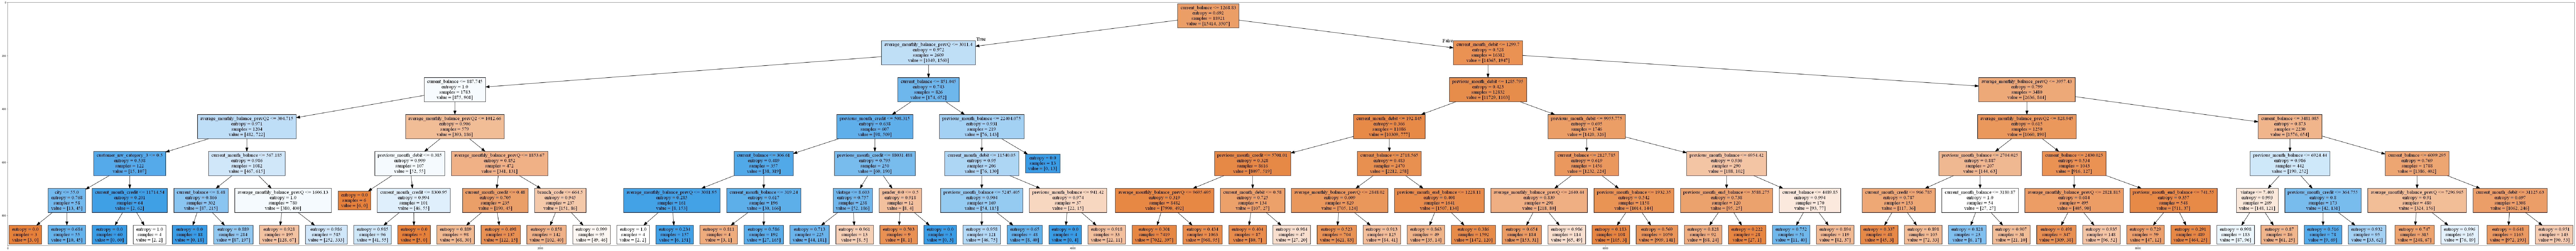

In [297]:
image=plt.imread("tree.png")
plt.figure(figsize=(200,500))
plt.imshow(image)
plt.show()

# Ensembling 

In [299]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
ensemble_score=cv_score(RandomForestClassifier(n_estimators=100,max_depth=6,random_state=10,
                                               criterion="entropy"))
ensemble_score



1 of kfold 5
ROC AUC Score: 0.8093696434076662, Recall Score: 0.2966, Precision Score: 0.7482 

2 of kfold 5
ROC AUC Score: 0.8356516288151269, Recall Score: 0.2709, Precision Score: 0.7917 

3 of kfold 5
ROC AUC Score: 0.8285912399515833, Recall Score: 0.3023, Precision Score: 0.7644 

4 of kfold 5
ROC AUC Score: 0.8189662013038274, Recall Score: 0.2909, Precision Score: 0.7556 

5 of kfold 5
ROC AUC Score: 0.8165596589787782, Recall Score: 0.2994, Precision Score: 0.7464 


([0.8093696434076662,
  0.8356516288151269,
  0.8285912399515833,
  0.8189662013038274,
  0.8165596589787782],
 [0.2965779467680608,
  0.2709125475285171,
  0.30228136882129275,
  0.2908745247148289,
  0.2994296577946768])

In [308]:
ensemble_score_ROC=ensemble_score[0]
ensemble_score_recall=ensemble_score[1]

## Comparison of Different model fold wise



## ROC 

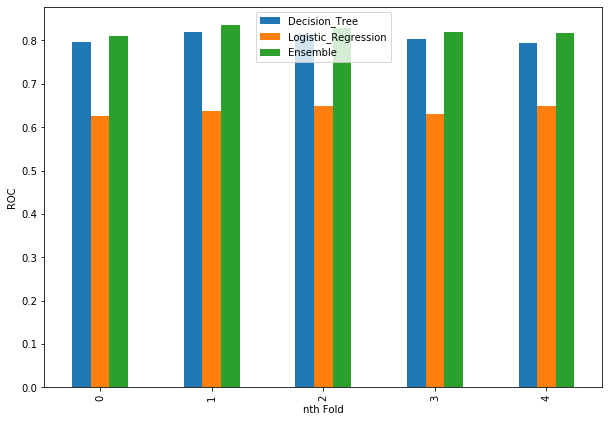

In [311]:
ROC_results_df = pd.DataFrame({'Decision_Tree':Dec_ROC ,'Logistic_Regression':Log_ROC,"Ensemble":ensemble_score_ROC})
ROC_results_df.plot(y=['Decision_Tree','Logistic_Regression','Ensemble'],kind="bar",figsize=(10,7))
plt.xlabel("nth Fold")
plt.ylabel("ROC")
plt.show()


- Ensemble>Decision_Tree>Logistic_regression

## Recall 

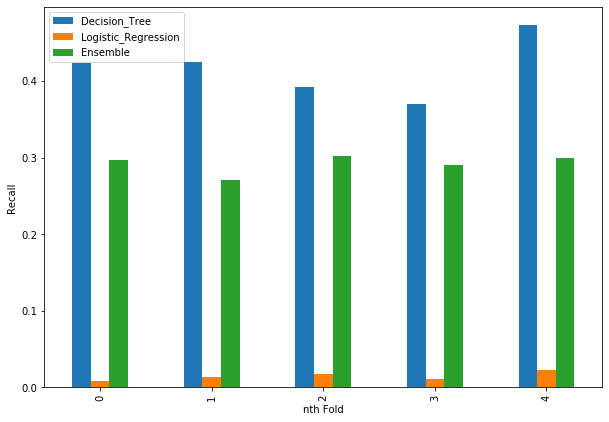

In [312]:
Recall_results_df = pd.DataFrame({'Decision_Tree':Dec_recall ,'Logistic_Regression':Log_Recall,"Ensemble":ensemble_score_recall})
Recall_results_df.plot(y=['Decision_Tree','Logistic_Regression','Ensemble'],kind="bar",figsize=(10,7))
plt.xlabel("nth Fold")
plt.ylabel("Recall")
plt.show()

- Logistic Regression is worst to apply here